In [46]:
# Importando Librerias
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir("C:\\Users\\wichi\\OneDrive\\Documentos\\EBAC\\Data Science\\Actividades\\Arboles de decision\\Activity")

In [69]:
# Cargar los datos
df_origin = pd.read_csv("drugs.csv")
df_origin

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [70]:
df_origin["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [71]:
#Separando el data set en variables independientes y dependientes
feature_cols = ["Age", "Sex","BP", "Cholesterol", "Na_to_K" ]
x = df_origin[feature_cols].values
y = df_origin.Drug

In [72]:
x

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [73]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [74]:
#Cambiando variables categoricas a numericas
from sklearn import preprocessing
Cod_Sex = preprocessing.LabelEncoder()
Cod_Sex.fit(["F","M"])

LabelEncoder()

In [75]:
x[:,1] = Cod_Sex.transform(x[:,1])

In [76]:
Cod_BP = preprocessing.LabelEncoder()
Cod_BP.fit(["HIGH","NORMAL","LOW"])

LabelEncoder()

In [77]:
x[:,2] = Cod_BP.transform(x[:,2])

In [78]:
Cod_Cholesterol = preprocessing.LabelEncoder()
Cod_Cholesterol.fit(['HIGH', 'NORMAL'])

LabelEncoder()

In [79]:
x[:,3] = Cod_Cholesterol.transform(x[:,3])

In [80]:
x

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

In [81]:
#Crear bases de entrenamiento y prueba
from sklearn.model_selection import train_test_split


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [83]:
len(x_train)

140

In [84]:
len(x_test)

60

In [85]:
#Entrenamiento del modelo del arbol de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [86]:
y_train

116    drugX
67     drugX
78     drugA
42     drugY
17     drugA
       ...  
133    drugY
137    drugA
72     drugX
140    drugA
37     drugX
Name: Drug, Length: 140, dtype: object

In [87]:
x_train

array([[67, 1, 2, 1, 9.514],
       [17, 1, 2, 1, 10.832],
       [19, 0, 0, 0, 13.313],
       [50, 1, 2, 1, 15.79],
       [43, 1, 0, 0, 13.972],
       [22, 0, 2, 0, 8.607],
       [35, 1, 2, 1, 7.845],
       [37, 1, 1, 1, 8.968],
       [23, 1, 2, 0, 31.686],
       [29, 1, 0, 0, 12.856],
       [68, 0, 0, 1, 10.189],
       [47, 0, 1, 0, 10.067],
       [36, 0, 0, 1, 15.49],
       [59, 0, 1, 0, 10.444],
       [58, 0, 1, 0, 26.645],
       [65, 0, 1, 1, 13.769],
       [43, 1, 1, 0, 15.376],
       [40, 0, 2, 0, 10.103],
       [42, 0, 1, 1, 29.271],
       [28, 1, 2, 0, 27.064],
       [37, 1, 1, 1, 16.724],
       [62, 1, 2, 0, 16.594],
       [64, 1, 2, 0, 7.761],
       [34, 1, 2, 0, 22.456],
       [23, 1, 0, 0, 8.011],
       [74, 0, 1, 0, 20.942],
       [32, 0, 1, 0, 9.712],
       [49, 1, 1, 1, 13.598],
       [47, 1, 0, 0, 10.403],
       [66, 0, 2, 1, 8.107],
       [15, 0, 0, 1, 16.725],
       [32, 1, 0, 1, 9.445],
       [57, 0, 0, 1, 9.945],
       [70, 1, 0, 0, 9

## Arbol de decision configuración Gini

In [100]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [101]:
y_pred = clf.predict(x_test)

In [102]:
y_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA'], dtype=object)

In [103]:
#Matriz de confusion 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )
cm

array([[ 4,  0,  0,  0,  0],
       [ 2,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]], dtype=int64)

In [104]:
#Estadisticas de desempeño 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



El modelo tiene una alta precisión para las clases "drugB", "drugC", "drugX" y "drugY" (1.00) y una precisión ligeramente inferior para la clase "drugA" (0.67).
El recall es alto para todas las clases, excepto para "drugB" que tiene un valor de 0.67.
El F1-score muestra un buen equilibrio entre precisión y recall para la mayoría de las clases, excepto para "drugC", "drugX" y "drugY" que tienen un valor de 1.00.
La exactitud general del modelo es de 0.97, lo que indica un alto porcentaje de predicciones correctas en general.

In [93]:
#Graficar arbol de decision
!pip install graphviz
!pip install pydotplus

In [94]:
from sklearn import tree
import graphviz
import pydotplus
from PIL import Image

In [105]:
#Creacion de la informacion para el arbol
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols, class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])

#Crear grafica del arbol
graph = pydotplus.graph_from_dot_data(dot_data)

In [106]:

#Creacion del arbol en formato png
graph.write_png("drugs.png")

image = Image.open("drugs.png")
image.show()

### Árbol de decision configuracion entropía

In [108]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [109]:
y_pred = clf.predict(x_test)

In [110]:
#Matriz de confusion 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )
cm

array([[ 4,  0,  0,  0,  0],
       [ 2,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]], dtype=int64)

In [111]:
#Estadisticas de desempeño 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



In [113]:
#Creacion de la informacion para el arbol
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols, class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])

#Crear grafica del arbol
graph = pydotplus.graph_from_dot_data(dot_data)

In [114]:

#Creacion del arbol en formato png
graph.write_png("drugs.png")

image = Image.open("drugs.png")
image.show()

### 3) Explique verbalmente las reglas del árbol propuesto al momento de pronosticar

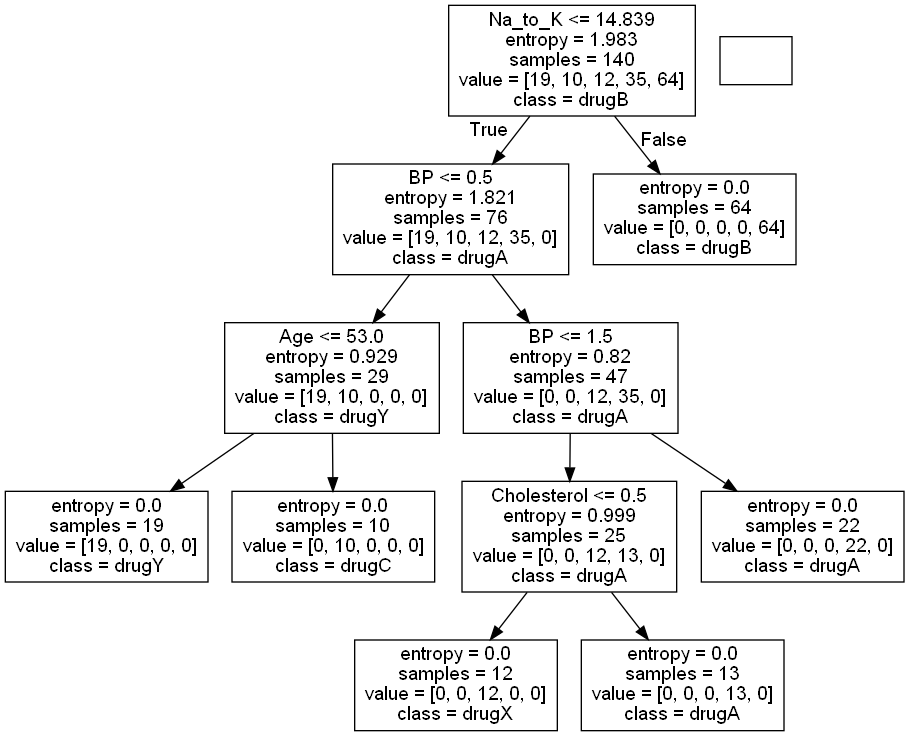

Si el paciente tiene el ratio Na_to_K menor o igual a 14.839, si su BP es menor o igual a 0.5, si su edad es igual o menor a 53 el medicamento que se le tiene que dar es el drugY. Si este mismo paciente tuviera una edad mayor a los 53, se le daria el tratamientoC.
Ahora de igual manera un paciente tiene el ratio Na_to_K menor o igual a 14.839 pero su BP es mayor o igual a 0.5, y su cholesterol es menor o igual a 0.5 se le da la droga X de lo contrario se le da la droga A. si este mismo paciente tiene una BP mayor a 1.5 se le da directamente la droga A.

### 4) ¿Qué medicamento recomendaría utilizar para un paciente con los siguientes datos? 

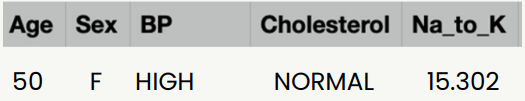

In [119]:
clf.predict([[50,0,0,1,15.302]])

array(['drugY'], dtype=object)